We have 125 days 01:56:45 worth of data for this one:
Points=1581 Min=9.9962831 Max=9.996290400000001 Mean=9.996287658127786 Std=1.1002612055156523e-06


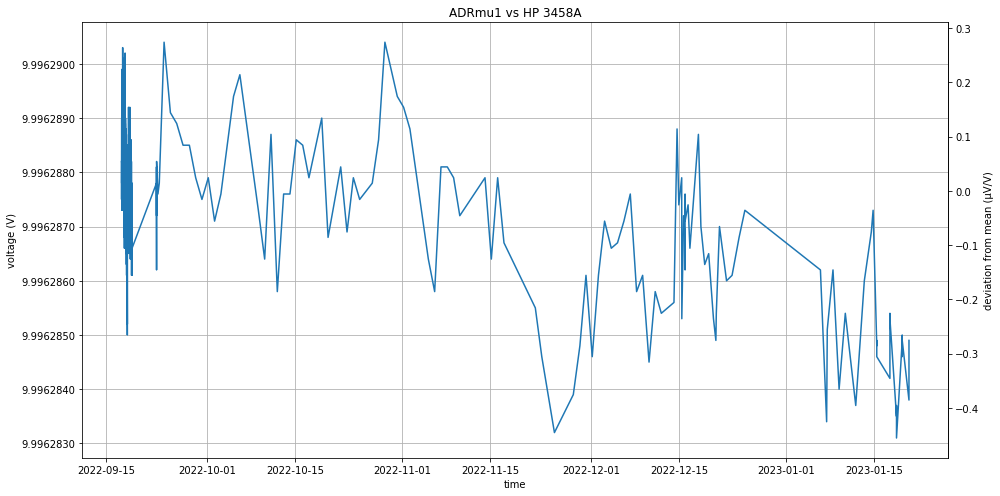

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Fetch data
columns = ["Time", "3458A"]
dut="ADRmu1"
raw=pd.read_csv("https://raw.githubusercontent.com/marcoreps/multiinstrumentalist/master/csv/"+dut+"-3458A.csv", usecols=columns)

# Use datetime as index
raw["Time"] = pd.to_datetime(raw["Time"])
raw = raw.set_index(pd.DatetimeIndex(raw["Time"]))
raw = raw.drop('Time', axis=1)

# Print some stats
print("We have "+str(raw.index.max() - raw.index.min())+" worth of data for this one:")
print("Points="+str(raw[columns[1]].count())+" \
Min="+str(raw[columns[1]].min())+" \
Max="+str(raw[columns[1]].max())+" \
Mean="+str(raw[columns[1]].mean())+" \
Std="+str(raw[columns[1]].std()))

# Conversion functions for secondary Y-axis
def to_ppm(x):
    return (x-raw[columns[1]].mean())/.00001

def from_ppm(x):
    return x*.00001+raw[columns[1]].mean()

# Set up a plot
plt.rcParams["figure.figsize"] = [14, 7]
fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='time', ylabel='voltage (V)', title=dut+' vs HP 3458A')
ax.plot(raw)

# Set up a secondary Y-axis
secax = ax.secondary_yaxis('right', functions=(to_ppm, from_ppm))
secax.set_ylabel('deviation from mean (µV/V)')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.7f'))

plt.show()


ADRmu1 vs ADRmu2
Both were measured on 91 days:
Max diff=0.01636219999999966     Mean=0.0163603087912088     Std=9.072422622268335e-07


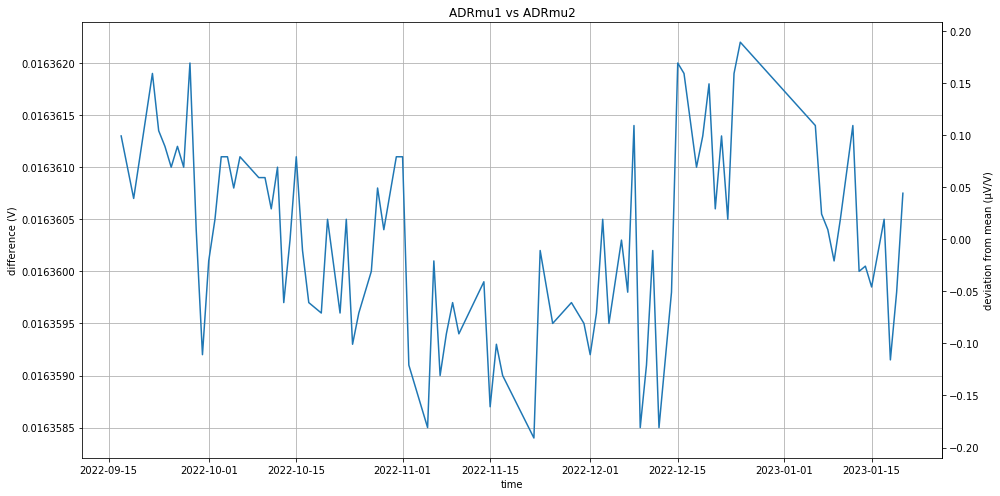

ADRmu1 vs ADRmu3
Both were measured on 91 days:
Max diff=0.07783249999999953     Mean=0.07782941483516483     Std=1.3952199050032851e-06


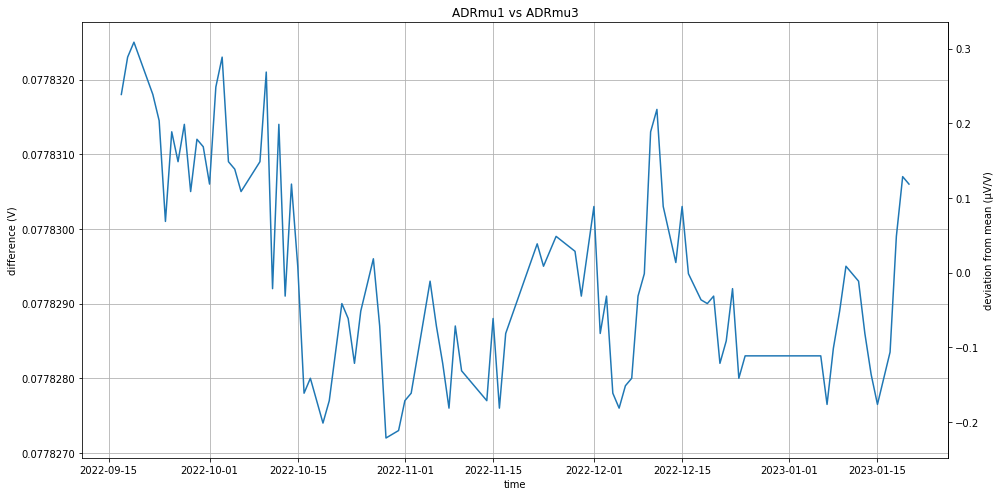

ADRmu1 vs ADRmu4
Both were measured on 90 days:
Max diff=0.00800279999999809     Mean=0.007999093888888866     Std=1.6312060021970011e-06


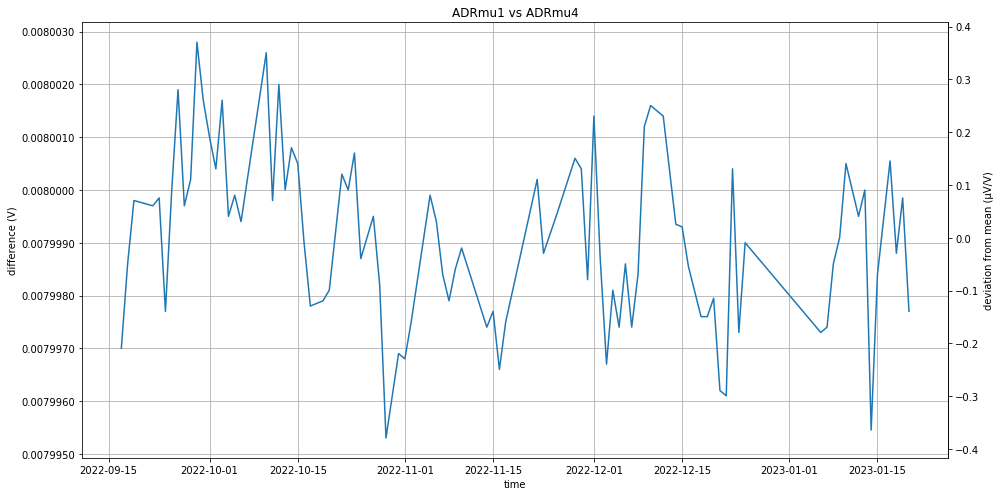

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

def MUvsMU(dut1, dut2):
    print(dut1+' vs '+dut2)
    
    # Fetch data
    columns = ["Time", "3458A"]
    DUT_one=pd.read_csv("https://raw.githubusercontent.com/marcoreps/multiinstrumentalist/master/csv/"+dut1+"-3458A.csv", usecols=columns)
    DUT_two=pd.read_csv("https://raw.githubusercontent.com/marcoreps/multiinstrumentalist/master/csv/"+dut2+"-3458A.csv", usecols=columns)

    # Use datetime as index
    DUT_one["Time"] = pd.to_datetime(DUT_one["Time"])
    DUT_one = DUT_one.set_index(pd.DatetimeIndex(DUT_one["Time"]))
    DUT_one = DUT_one.drop('Time', axis=1)
    DUT_one = DUT_one.rename(columns={"3458A": "one"})

    # Resample to one daily value
    daily_one = DUT_one.resample("d").median()

    DUT_two["Time"] = pd.to_datetime(DUT_two["Time"])
    DUT_two = DUT_two.set_index(pd.DatetimeIndex(DUT_two["Time"]))
    DUT_two = DUT_two.drop('Time', axis=1)
    DUT_two = DUT_two.rename(columns={"3458A": "two"})
    daily_two = DUT_two.resample("d").median()

    # Join one and two based on day
    both = daily_one.join(daily_two, on="Time")
    both= both.dropna()
    both["diff"] = abs(both["one"] - both["two"])

    #Print some stats
    print("Both were measured on "+str(len(both))+" days:")
    print("Max diff="+str(both["diff"].max())+" \
    Mean="+str(both["diff"].mean())+" \
    Std="+str(both["diff"].std()))

    # Conversion functions for secondary Y-axis
    def to_ppm(x):
        return (x-both["diff"].mean())/.00001

    def from_ppm(x):
        return x*.00001+both["diff"].mean()

    # Set up a plot
    plt.rcParams["figure.figsize"] = [14, 7]
    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='time', ylabel='difference (V)', title=dut1+' vs '+dut2)
    ax.plot(both["diff"])

    # Set up a secondary Y-axis
    secax = ax.secondary_yaxis('right', functions=(to_ppm, from_ppm))
    secax.set_ylabel('deviation from mean (µV/V)')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.7f'))

    plt.show()

MUvsMU("ADRmu1", "ADRmu2")
MUvsMU("ADRmu1", "ADRmu3")
MUvsMU("ADRmu1", "ADRmu4")